In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('smsspamcollection.tsv', sep = '\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.sample(5) #randomly

,label,message,length,punct
1756,ham,Really good:)dhanush rocks once again:),39,4
3352,ham,At what time are you coming.,28,1
4867,ham,"Oh! Shit, I thought that was your trip! Looooo...",297,26
271,ham,"Come to mu, we're sorting out our narcotics si...",53,2
2375,ham,Dunno lei he neva say...,24,3


In [5]:
df.shape

(5572, 4)

In [6]:
#1. Data Cleaning
#2. EDA
#3. Text Preprocessing
#4. Model Building
#5. Evaluation
#6. Improvement depending on evaluation
#7. Website
#8. Deploy

# 1. Data Cleaning

In [7]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


In [9]:
df1 = df.drop(columns = ['length', 'punct'])

In [10]:
df1.sample(5)

,label,message
4925,ham,We can go 4 e normal pilates after our intro...
3730,ham,I'm at home. Please call
828,ham,Hey. You got any mail?
4455,ham,I'm home. Ard wat time will u reach?
4118,ham,Sure thing big man. i have hockey elections at...


In [11]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
encoder.fit_transform(df1['label'])

array([0, 0, 1, ..., 0, 0, 0])

In [13]:
df1['label'] = encoder.fit_transform(df1['label'])

In [14]:
df1.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df1.isnull().sum()

label      0
message    0
dtype: int64

In [16]:
df1.duplicated().sum()

403

In [17]:
df1.drop_duplicates(keep = 'first', inplace = True)

In [18]:
df1

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [19]:
df1.shape

(5169, 2)

# EDA

In [20]:
df1.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df1['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

In [22]:
import matplotlib.pyplot as plt

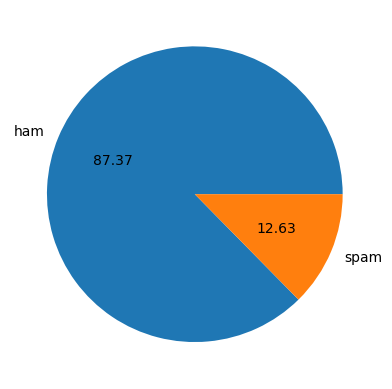

In [23]:
plt.pie(df1['label'].value_counts(), labels = ['ham','spam'], autopct = '%0.2f')
plt.show()

In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gratitude\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df1['message'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: message, Length: 5169, dtype: int64

In [27]:
df1['num_characters'] = df['message'].apply(len)

In [28]:
df1

,label,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will ü b going to esplanade fr home?,36
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [29]:
#Number of words
df1['message'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: message, Length: 5169, dtype: int64

In [30]:
df1['num_words'] = df1['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df1.head()

,label,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df1['message'].apply(lambda x:(nltk.sent_tokenize(x)))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568               [Will ü b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: message, Length: 5169, dtype: object

In [33]:
df1['num_sentences'] = df1['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
df1

,label,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will ü b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [35]:
df1[['num_words', 'num_characters', 'num_sentences']].describe()

,num_words,num_characters,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,18.593538,79.344941,1.974076
std,13.402779,58.439256,1.458967
min,1.000000,2.000000,1.000000
25%,9.000000,36.000000,1.000000
50%,15.000000,61.000000,1.000000
75%,26.000000,119.000000,2.000000
max,220.000000,910.000000,38.000000


In [36]:
df1[df1['label'] == 0][['num_words','num_characters', 'num_sentences']].describe()

,num_words,num_characters,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,17.267715,70.906333,1.827724
std,13.588065,56.717234,1.394338
min,1.000000,2.000000,1.000000
25%,8.000000,34.000000,1.000000
50%,13.000000,53.000000,1.000000
75%,22.000000,91.000000,2.000000
max,220.000000,910.000000,38.000000


In [37]:
df1[df1['label'] == 1][['num_words','num_characters', 'num_sentences']].describe()

,num_words,num_characters,num_sentences
count,653.000000,653.000000,653.000000
mean,27.762634,137.704441,2.986217
std,6.993008,29.821348,1.494815
min,2.000000,13.000000,1.000000
25%,25.000000,132.000000,2.000000
50%,29.000000,148.000000,3.000000
75%,32.000000,157.000000,4.000000
max,46.000000,223.000000,9.000000


In [38]:
df1['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

In [39]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

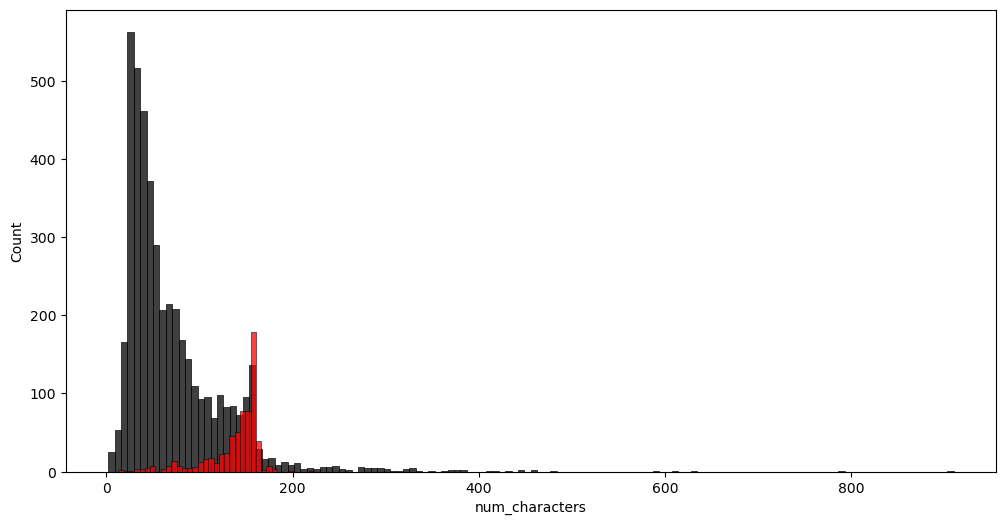

In [40]:
plt.figure(figsize = (12,6))
sns.histplot(df1[df1['label'] == 0]['num_characters'], color = 'k')
sns.histplot(df1[df1['label'] == 1]['num_characters'], color = 'r')

<Axes: xlabel='num_words', ylabel='Count'>

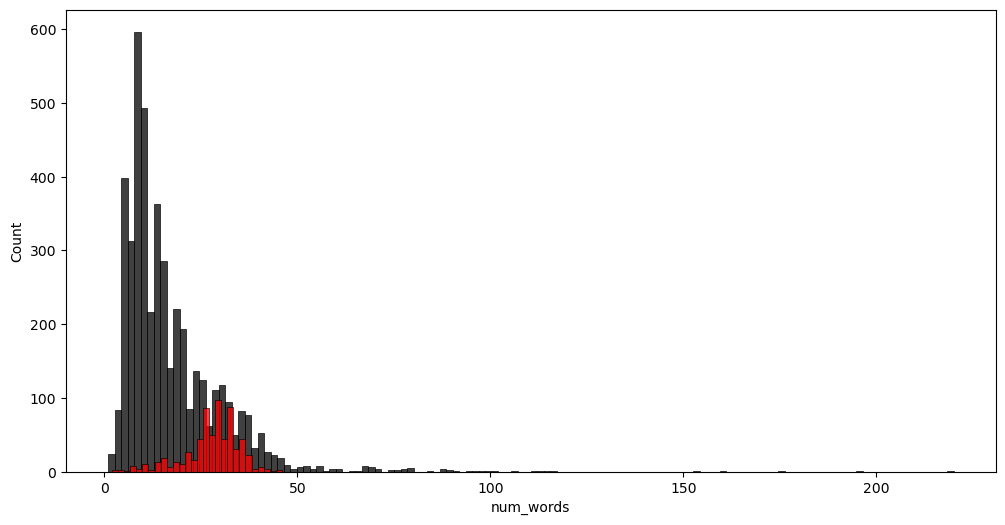

In [41]:
plt.figure(figsize = (12,6))
sns.histplot(df1[df1['label'] == 0]['num_words'], color = 'k')
sns.histplot(df1[df1['label'] == 1]['num_words'], color = 'r')

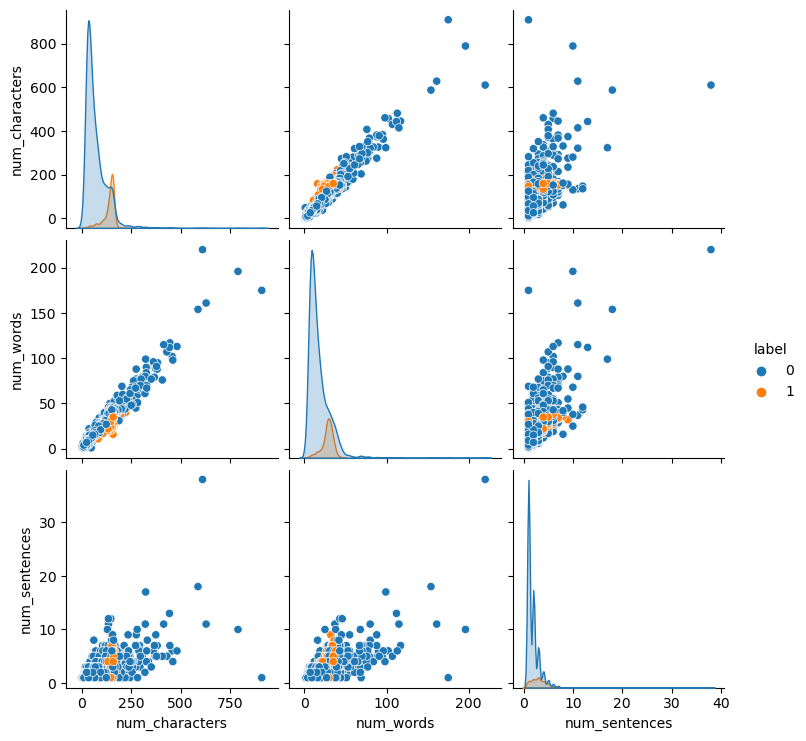

In [42]:
sns.pairplot(df1,hue = 'label')

In [43]:
df2 = df1.drop(columns = ['message'])
df2.head()

,label,num_characters,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1


In [44]:
df2.corr()

,label,num_characters,num_words,num_sentences
label,1.000000,0.379777,0.260168,0.263826
num_characters,0.379777,1.000000,0.966002,0.622566
num_words,0.260168,0.966002,1.000000,0.679142
num_sentences,0.263826,0.622566,0.679142,1.000000


<Axes: >

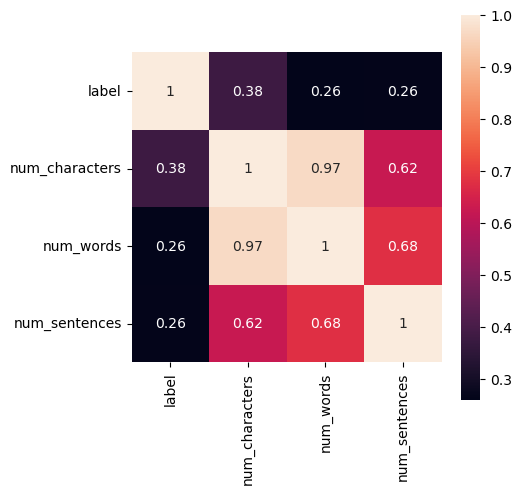

In [45]:
plt.figure(figsize = (5,5))
sns.heatmap(df2.corr(), annot = True, square = True)

# 3.Data Preprocessing

In [46]:
#1. LowerCase
#2. Tokenization
#3. Remove special character
#4. Remove stopwords and punctuation
#5. Stemming

In [47]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [49]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)


    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)


    text=y[:]
    y.clear()


    for i in text:
        y.append(ps.stem(i))
        return " ".join(y)

In [50]:
from nltk.corpus import stopwords

In [51]:
df1['message'].apply(transform_text)

0         go
1         ok
2       free
3          u
4        nah
        ... 
5567     2nd
5568       ü
5569    piti
5570     guy
5571    rofl
Name: message, Length: 5169, dtype: object

In [52]:
df1.head()

,label,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [53]:
df1['transformed_message'] = df1['message'].apply(transform_text)

In [54]:
df1.head()

,label,message,num_characters,num_words,num_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go
1,0,Ok lar... Joking wif u oni...,29,8,2,ok
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free
3,0,U dun say so early hor... U c already then say...,49,13,1,u
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah


In [55]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [56]:
from wordcloud import WordCloud

In [57]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'black')

In [58]:
spam_wc = wc.generate(df1[df1['label'] ==1]['transformed_message'].str.cat(sep = " "))

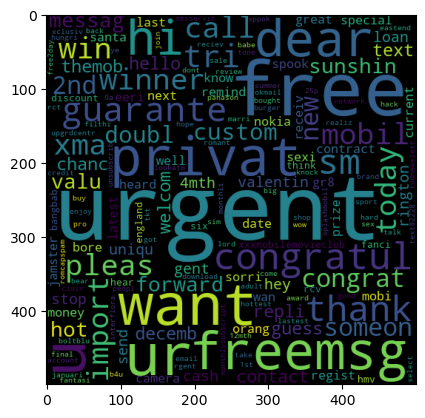

In [59]:
plt.imshow(spam_wc)

In [60]:
ham_wc = wc.generate(df1[df1['label'] ==0]['transformed_message'].str.cat(sep = " "))

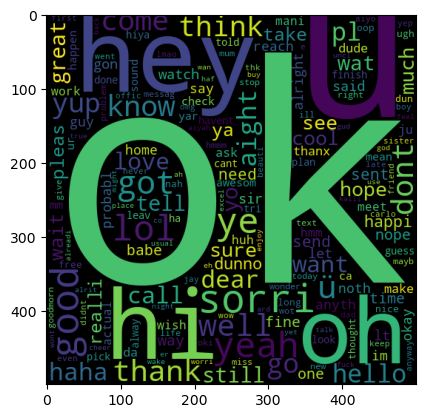

In [61]:
plt.imshow(ham_wc)

In [62]:
df1[df1['label'] == 1]['transformed_message'].tolist()

['free',
 'freemsg',
 'winner',
 'mobil',
 'six',
 'urgent',
 'xxxmobilemovieclub',
 'england',
 'thank',
 '07732584351',
 'sm',
 'congrat',
 'valu',
 'urgent',
 'hear',
 'pleas',
 'free',
 'gent',
 'winner',
 'privat',
 'urgent',
 'today',
 'sunshin',
 'want',
 'rcv',
 'freemsg',
 'custom',
 'winner',
 'stop',
 'bangbab',
 'urgent',
 'pleas',
 'uniqu',
 '500',
 'u',
 'text',
 'u',
 'congratul',
 'tri',
 'hey',
 'ur',
 'rington',
 'hmv',
 'custom',
 'sm',
 'themob',
 'think',
 'decemb',
 'call',
 'valentin',
 'fanci',
 'ur',
 'xma',
 'discount',
 'thank',
 'doubl',
 '4mth',
 'free',
 '100',
 'free',
 'send',
 'someon',
 'urgent',
 'congrat',
 'loan',
 'upgrdcentr',
 'okmail',
 'want',
 'free',
 'congrat',
 'congratul',
 'guarante',
 'boltblu',
 'credit',
 'urgent',
 'today',
 'reciev',
 'privat',
 'monthlysubscript',
 'gent',
 'cash',
 'mobil',
 'tri',
 'ur',
 'special',
 'privat',
 'import',
 'xclusiv',
 '22',
 'new',
 'today',
 'dear',
 'privat',
 'cash',
 '88800',
 'sm',
 'get',
 'h

In [63]:
spam_corpus = []
for msg in df1[df1['label'] == 1]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [64]:
len(spam_corpus)

653

In [65]:
from collections import Counter

In [66]:
Counter(spam_corpus)

Counter({'free': 31,
         'freemsg': 14,
         'winner': 7,
         'mobil': 7,
         'six': 1,
         'urgent': 49,
         'xxxmobilemovieclub': 1,
         'england': 1,
         'thank': 10,
         '07732584351': 1,
         'sm': 10,
         'congrat': 6,
         'valu': 4,
         'hear': 1,
         'pleas': 7,
         'gent': 2,
         'privat': 15,
         'today': 7,
         'sunshin': 4,
         'want': 18,
         'rcv': 1,
         'custom': 5,
         'stop': 2,
         'bangbab': 1,
         'uniqu': 2,
         '500': 4,
         'u': 20,
         'text': 3,
         'congratul': 11,
         'tri': 8,
         'hey': 2,
         'ur': 18,
         'rington': 2,
         'hmv': 1,
         'themob': 3,
         'think': 1,
         'decemb': 3,
         'call': 7,
         'valentin': 2,
         'fanci': 1,
         'xma': 7,
         'discount': 1,
         'doubl': 5,
         '4mth': 2,
         '100': 1,
         'send': 2,
         'som

In [69]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('u', 8),
 ('k', 7),
 ('ok', 6),
 ('sorri', 6),
 ('hi', 6),
 ('go', 5),
 ('call', 5),
 ('ye', 5),
 ('yeah', 4),
 ('yup', 4),
 ('see', 4),
 ('hello', 4),
 ('know', 4),
 ('ü', 3),
 ('new', 3),
 ('dear', 3),
 ('gon', 2),
 ('lol', 2),
 ('wait', 2),
 ('great', 2),
 ('get', 2),
 ('wow', 2),
 ('still', 2),
 ('place', 2),
 ('pleas', 2),
 ('okay', 2),
 ('aight', 2),
 ('would', 2),
 ('hey', 2),
 ('home', 2)]

In [70]:
df3 = pd.DataFrame(Counter(spam_corpus).most_common(30))

In [72]:
df3.head()

,0,1
0,u,8
1,k,7
2,ok,6
3,sorri,6
4,hi,6


In [75]:
df3 = df3.rename(columns = {0:'Word', 1:'Count'})
df3

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
